In [1]:
from IPython.display import clear_output
!pip install imutils
clear_output()

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import scipy
!pip install colorama
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from tqdm import tqdm, tqdm_notebook
from colorama import Fore
import json
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from skimage.io import *
import time
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import xgboost as xgb
import numpy as np 
from tqdm import tqdm
import cv2
import os
import shutil
import itertools
import datetime

import imutils
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications import *
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint,TensorBoard
from keras.losses import *

init_notebook_mode(connected=True)
RANDOM_SEED = 42

In [6]:
!unzip /content/weedclassification.zip

Archive:  /content/weedclassification.zip
   creating: CELOSIA ARGENTEA L/
  inflating: CELOSIA ARGENTEA L/00ab26d4-71a6-4185-970f-e03166ad10ae.jpeg  
  inflating: CELOSIA ARGENTEA L/02c1e6be-7874-4522-8f0e-f31721338e4b.jpeg  
  inflating: CELOSIA ARGENTEA L/05b2dc2d-457e-45e5-8673-978b103c206e (1).jpeg  
  inflating: CELOSIA ARGENTEA L/05b2dc2d-457e-45e5-8673-978b103c206e.jpeg  
  inflating: CELOSIA ARGENTEA L/0a972387-eec9-4fc8-8665-0658a2332af7.jpeg  
  inflating: CELOSIA ARGENTEA L/0cb3e491-1cd9-4328-850b-cdea2d399b13.jpeg  
  inflating: CELOSIA ARGENTEA L/15414227-4fdc-4415-887e-54653f2150ed.jpeg  
  inflating: CELOSIA ARGENTEA L/1cffda84-d376-48da-b8a3-e0caca6c16b6.jpeg  
  inflating: CELOSIA ARGENTEA L/1fb852ef-7c1d-4f2a-9331-812a14060f34.jpeg  
  inflating: CELOSIA ARGENTEA L/23988564-b739-4e67-87ad-38d9394847c3.jpeg  
  inflating: CELOSIA ARGENTEA L/2a46ffe4-0700-4af2-a1ad-eaccd90efa63.jpeg  
  inflating: CELOSIA ARGENTEA L/338a9356-339c-4c73-ac4e-9a483989577e.jpeg  
  inflati

In [7]:
!mkdir weedclassification

In [8]:
base_dir = "/content/weedclassification"

In [15]:
celosia_argentea_dir = f'{base_dir}/CELOSIA ARGENTEA L'
crowfoot_grass_dir = f'{base_dir}/CROWFOOT GRASS'
purple_chloris_dir = f'{base_dir}/PURPLE CHLORIS'

In [16]:
from keras.preprocessing.image import ImageDataGenerator

labels = ['CELOSIA ARGENTEA L','CROWFOOT GRASS','PURPLE CHLORIS']
X_train = []
y_train = []
X_test = [] # testing images.
y_test = [] 

image_size = 224
for i in labels:
    folderPath = f"{base_dir}/{i}"
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train) / 255.0 
print(X_train.shape)

100%|██████████| 73/73 [00:00<00:00, 73.46it/s]


(193, 224, 224, 3)


In [17]:
def plot_samples(X, y, labels_dict, n=50):
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('Weed: {}'.format(labels_dict[index]))
        plt.show()

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.2,random_state=42)

y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(39, 224, 224, 3)
(154, 224, 224, 3)
(154, 3)
(39, 3)


In [19]:
labels

['CELOSIA ARGENTEA L', 'CROWFOOT GRASS', 'PURPLE CHLORIS']

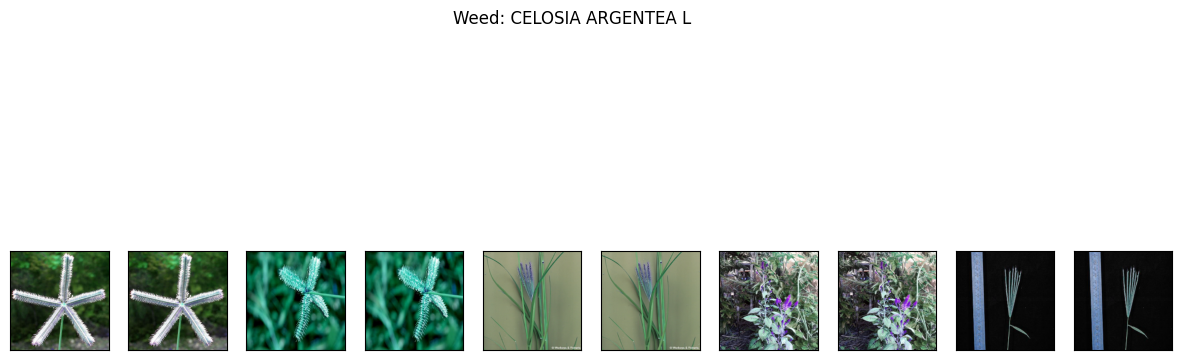

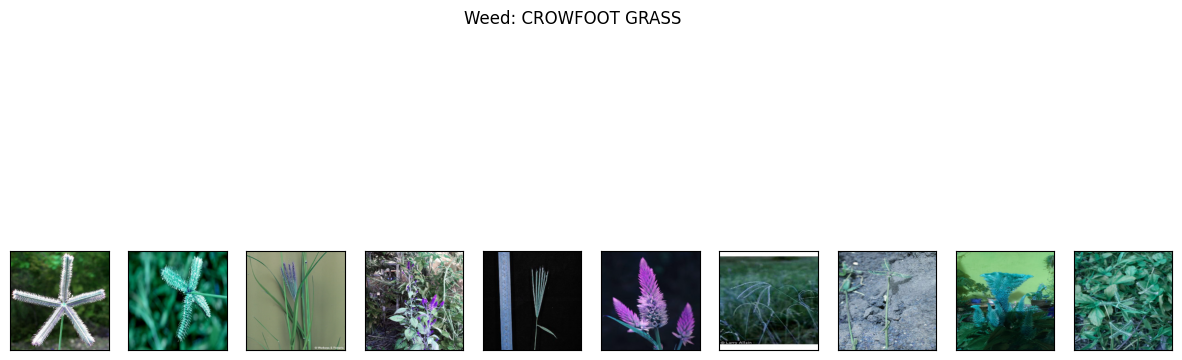

<Figure size 1500x600 with 0 Axes>

In [22]:
plot_samples(X_train, y_train, labels, 10)

In [21]:
def preprocess_imgs(set_name, img_size):
    set_new = []
    for img in set_name:
        img = cv2.resize(
            img,
            dsize=img_size,
            interpolation=cv2.INTER_CUBIC
        )
        set_new.append(preprocess_input(img))
    return np.array(set_new)

In [23]:
IMG_SIZE = (224,224)

In [24]:
X_train_prep = preprocess_imgs(set_name=X_train, img_size=IMG_SIZE)

In [25]:
X_test_prep = preprocess_imgs(set_name=X_test, img_size=IMG_SIZE)

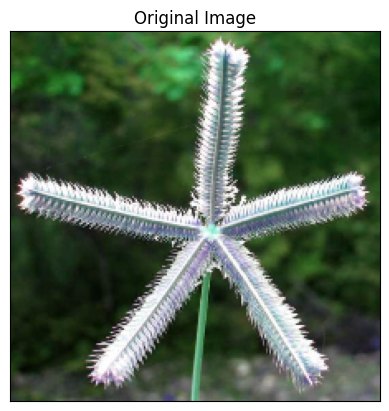

<Figure size 1500x600 with 0 Axes>

In [26]:
demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)
os.mkdir("preview13")
demo_datagen.fit(X_train)
        
plt.imshow(X_train[0])
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()
plt.figure(figsize=(15,6))
i = 1
for img in os.listdir('preview13/'):
    img = cv2.imread('preview13/' + img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,7,i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    i += 1
    if i > 3*7:
        break
plt.suptitle('Augmented Images')
plt.show()

In [27]:
X_train.shape

(154, 224, 224, 3)

In [28]:
y_train[0]

array([0., 1., 0.], dtype=float32)

In [29]:
class myCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('val_accuracy')>0.99):
            self.model.stop_training = True

callback = myCallbacks()

In [30]:
datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
)

datagen_val = ImageDataGenerator(rescale=1./255)

1) VGG - 19

In [53]:
pre_trained_model = VGG19(input_shape=(224,224,3), include_top=False, weights="imagenet")
#pre_trained_model.trainable = False

for layer in pre_trained_model.layers[:19]:
    layer.trainable = False

model1 = Sequential([
    pre_trained_model,
    MaxPool2D((2,2) , strides = 2),
    Flatten(),
    Dense(3 , activation='softmax')])
model1.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy','AUC'])
model1.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 512)        0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 4608)              0         
                                                                 
 dense_11 (Dense)            (None, 3)                 13827     
                                                                 
Total params: 20,038,211
Trainable params: 4,733,443
Non-trainable params: 15,304,768
_________________________________________________________________


In [54]:
hist1 = model1.fit(
    datagen.flow(X_train,y_train, batch_size=8),
    epochs=20,
    validation_data=datagen_val.flow(X_test,y_test),
    steps_per_epoch = len(X_train) / 8 ,
    callbacks=[callback]
)

Epoch 1/20
19/19 [==============================] - 15s 476ms/step - loss: 1.2559 - accuracy: 0.3182 - auc: 0.5044 - val_loss: 1.2253 - val_accuracy: 0.2308 - val_auc: 0.4117
Epoch 2/20
19/19 [==============================] - 2s 107ms/step - loss: 1.1225 - accuracy: 0.2857 - auc: 0.4362 - val_loss: 1.1010 - val_accuracy: 0.3590 - val_auc: 0.4744
Epoch 3/20
19/19 [==============================] - 2s 113ms/step - loss: 1.1045 - accuracy: 0.3442 - auc: 0.5360 - val_loss: 1.1183 - val_accuracy: 0.2308 - val_auc: 0.4259
Epoch 4/20
19/19 [==============================] - 3s 133ms/step - loss: 1.1058 - accuracy: 0.3571 - auc: 0.5036 - val_loss: 1.0976 - val_accuracy: 0.3590 - val_auc: 0.5192
Epoch 5/20
19/19 [==============================] - 2s 118ms/step - loss: 1.1002 - accuracy: 0.3831 - auc: 0.4936 - val_loss: 1.0999 - val_accuracy: 0.3590 - val_auc: 0.4744
Epoch 6/20
19/19 [==============================] - 2s 106ms/step - loss: 1.0962 - accuracy: 0.3831 - auc: 0.5302 - val_loss: 1.1

In [55]:
pred2 = model1.predict(X_train_prep)

5/5 [==============================] - 4s 1s/step


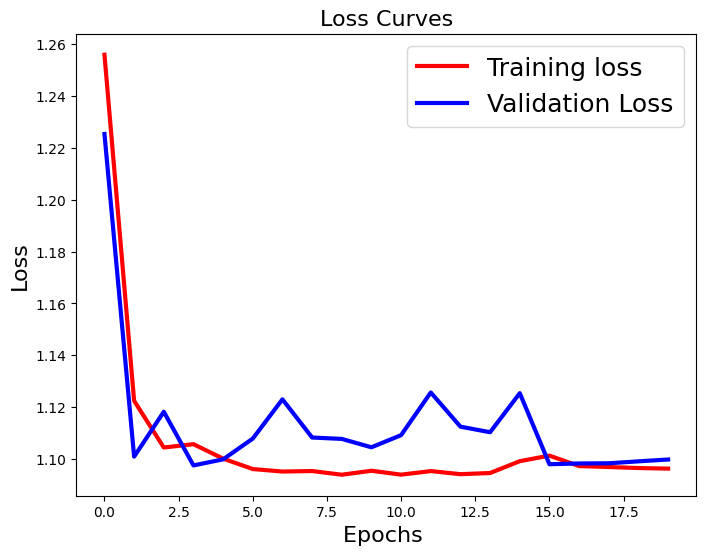

In [58]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(hist1.history['loss'],'r',linewidth=3.0)
plt.plot(hist1.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

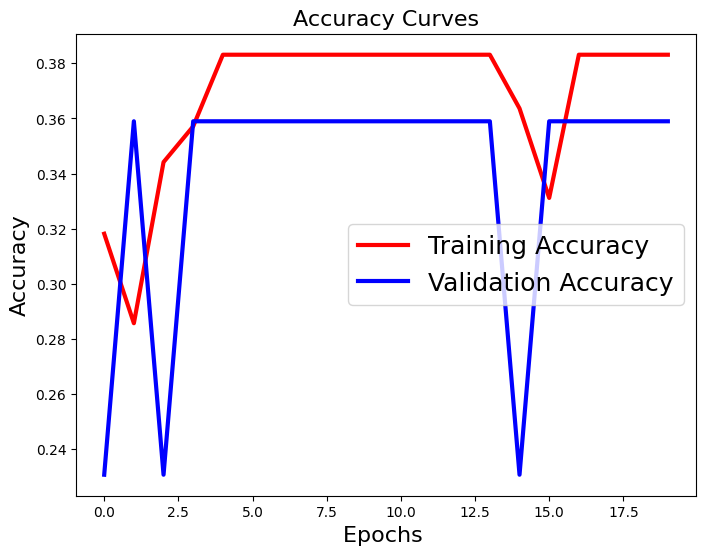

In [59]:
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(hist1.history['accuracy'],'r',linewidth=3.0)
plt.plot(hist1.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)   
plt.show()

RESNET101

In [31]:
from keras.applications import ResNet101V2
reslayer=ResNet101V2(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in reslayer.layers:
    layer.trainable=False

171317808/171317808 [==============================] - 1s 0us/step


In [42]:
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Customize the top layers
x = base_model.output
x = Flatten()(x)
predictions = Dense(3, activation='softmax')(x)
# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Freeze the base layers
for layer in base_model.layers:
    layer.trainable = False
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

171446536/171446536 [==============================] - 1s 0us/step


In [44]:
hist2 = model.fit(
    datagen.flow(X_train_prep,y_train, batch_size=16),
    epochs=20,
    validation_data=datagen_val.flow(X_test_prep,y_test),
    steps_per_epoch = len(X_train_prep) / 16 ,
    callbacks=[callback]
)
hist2

Epoch 1/20
9/9 [==============================] - 19s 1s/step - loss: 4.5407 - accuracy: 0.2987 - val_loss: 3.2342 - val_accuracy: 0.3590
Epoch 2/20
9/9 [==============================] - 2s 208ms/step - loss: 2.7144 - accuracy: 0.3442 - val_loss: 3.2138 - val_accuracy: 0.3590
Epoch 3/20
9/9 [==============================] - 2s 207ms/step - loss: 1.9475 - accuracy: 0.3247 - val_loss: 1.1799 - val_accuracy: 0.3590
Epoch 4/20
9/9 [==============================] - 2s 209ms/step - loss: 2.1003 - accuracy: 0.3377 - val_loss: 1.7831 - val_accuracy: 0.4103
Epoch 5/20
9/9 [==============================] - 3s 275ms/step - loss: 2.1953 - accuracy: 0.3247 - val_loss: 1.0920 - val_accuracy: 0.4103
Epoch 6/20
9/9 [==============================] - 2s 228ms/step - loss: 1.9099 - accuracy: 0.3312 - val_loss: 1.7631 - val_accuracy: 0.4103
Epoch 7/20
9/9 [==============================] - 2s 214ms/step - loss: 1.6721 - accuracy: 0.2922 - val_loss: 1.3076 - val_accuracy: 0.3590
Epoch 8/20
9/9 [======

In [45]:
pred = model.predict(X_train_prep)

5/5 [==============================] - 6s 406ms/step


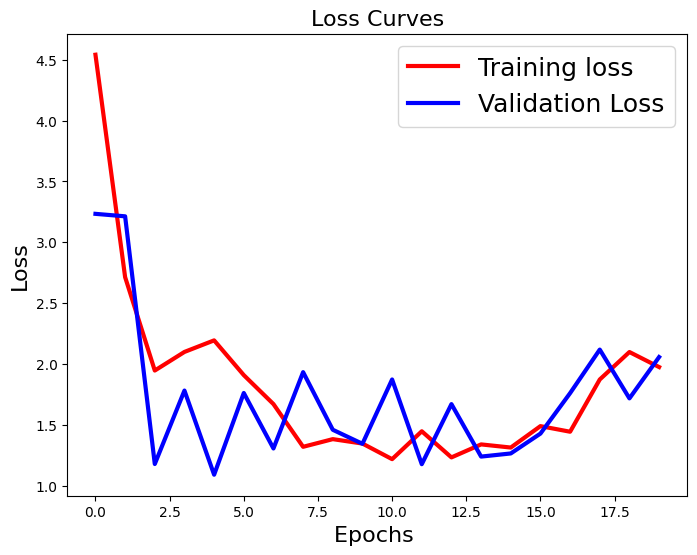

In [46]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(hist2.history['loss'],'r',linewidth=3.0)
plt.plot(hist2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

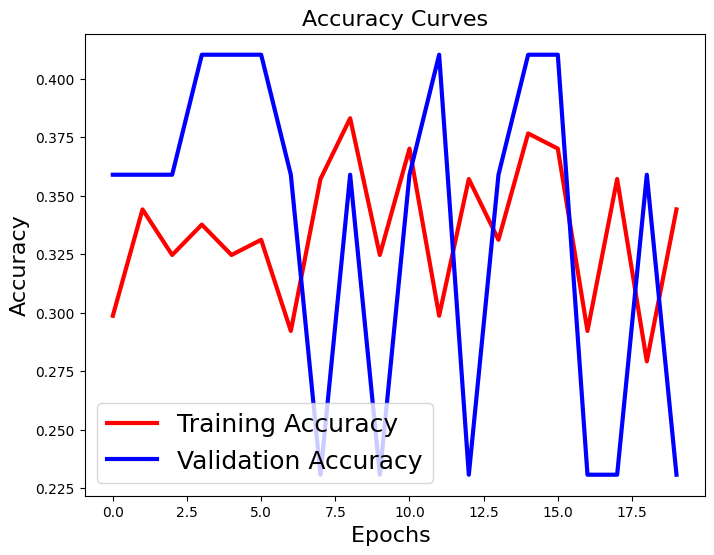

In [47]:
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(hist2.history['accuracy'],'r',linewidth=3.0)
plt.plot(hist2.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)   
plt.show()

OpenCV

In [ ]:
def predict_weed():
    # Load the saved model
    model = tf.keras.models.load_model('saved_model')

    # Define the classes
    classes = ['celosia argentea l', 'crowfoot grass', 'purple chloris']

    # Open the webcam
    cap = cv2.VideoCapture(0)

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()

        # Resize the frame
        resized_frame = cv2.resize(frame, (150, 150))

        # Preprocess the frame
        preprocessed_frame = np.expand_dims(resized_frame, axis=0) / 255.0

        # Make a prediction
        prediction = model.predict(preprocessed_frame)

        # Get the predicted class
        predicted_class = classes[np.argmax(prediction)]

        # Add the predicted class label to the frame
        cv2.putText(frame, predicted_class, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Display the resulting frame
        cv2.imshow('frame', frame)

        # Exit on pressing 'q'
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the capture
    cap.release()
    cv2.destroyAllWindows()

# Save the trained model
model.save('saved_model')